# 1. Load Data

## 1.1 Import Libraries

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Load the dataset using pandas and print the first and last few rows

In [63]:
df = pd.read_csv('titanic.csv')

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Explanation of each column in the dataset:

1. PassengerId: A unique identifier for each passenger
2. Survived: Indicates whether the passenger survived (1) or not (0)
3. Pclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
4. Name: The full name of the passenger
5. Sex: The gender of the passenger (male or female)
6. Age: The age of the passenger in years
7. SibSp: Number of siblings and spouses the passenger had
8. Parch: Number of parents and children the passenger had
9. Ticket: The ticket number of the passenger
10. Fare: The fare the passenger paid for the ticket
11. Cabin: The cabin number where the passenger stayed
12. Embarked: The port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton)

## 1.3 Get statistical analytics of the dataset

In [66]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
# Description for categorical values
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## 1.4 Drop unneeded columns

In [68]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [69]:
df.drop(columns=['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [70]:
df.sample()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
93,94,0,3,male,26.0,1,2,20.575,S


# 2. Data Exploration

## 2.1 Check for missing values

In [71]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

## 2.2 Handle missing values

In [72]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\alaa0\AppData\Local\Temp\ipykernel_33352\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [73]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\alaa0\AppData\Local\Temp\ipykernel_33352\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [74]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# 3. Data Visualization

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

## 3.1 Visualize the distribution of numerical features

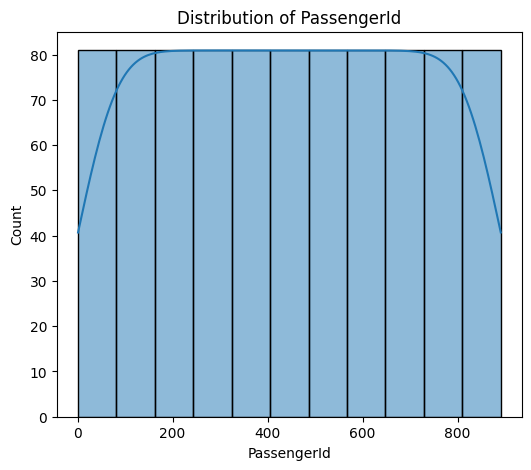

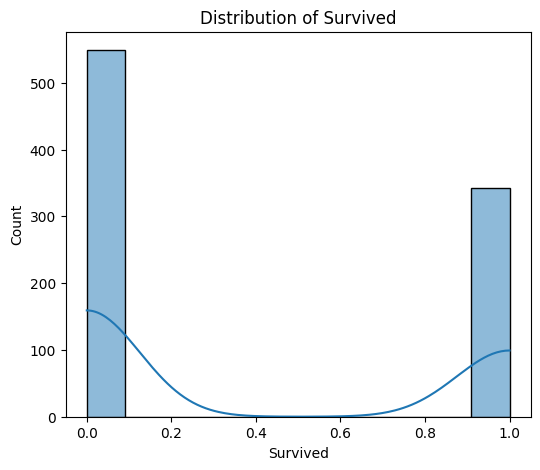

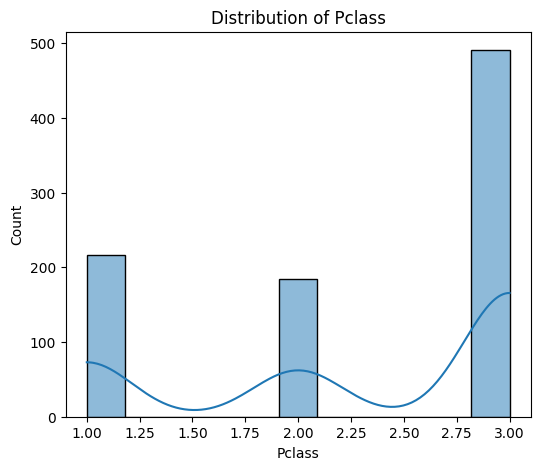

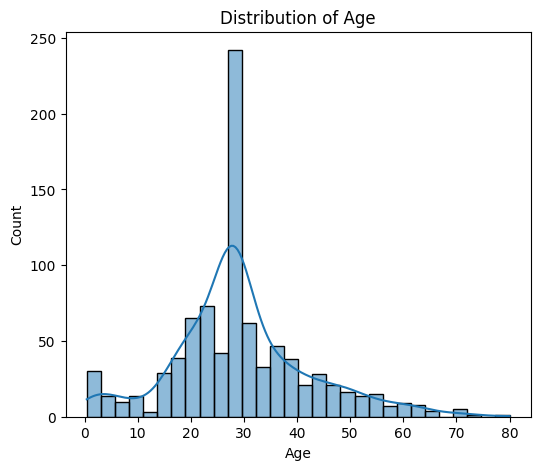

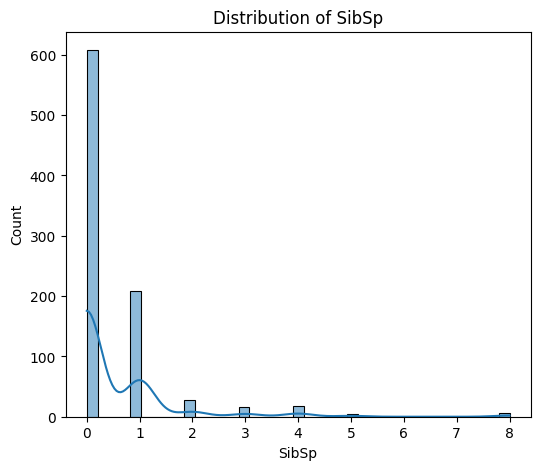

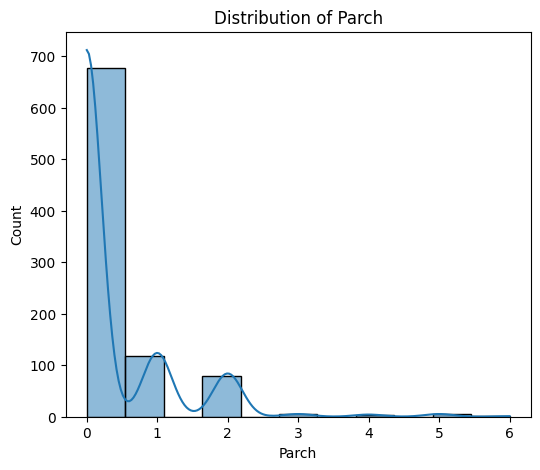

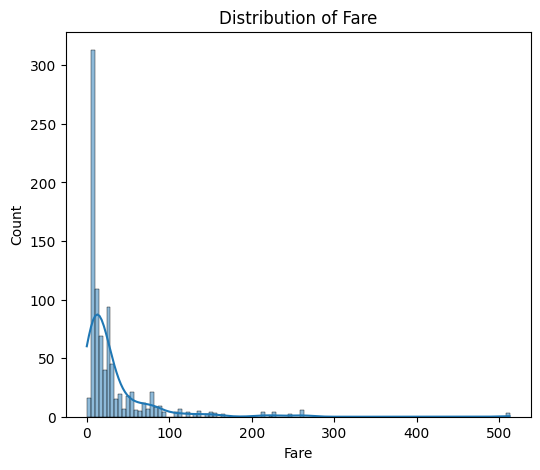

In [31]:
numerical_columns = df.select_dtypes(include=['number']).columns

for col in numerical_columns:
  plt.figure(figsize=(6, 5))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

## 3.2 Visualize the count of categorical features

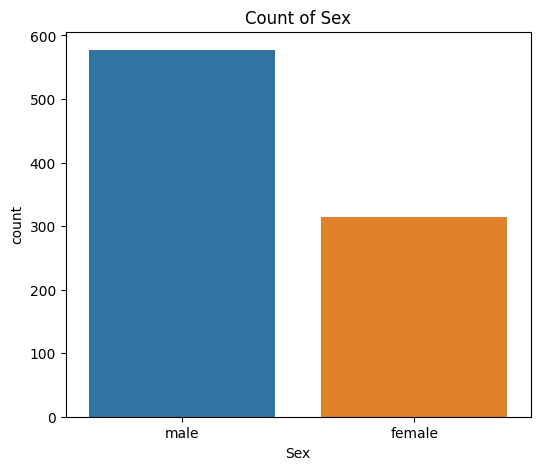

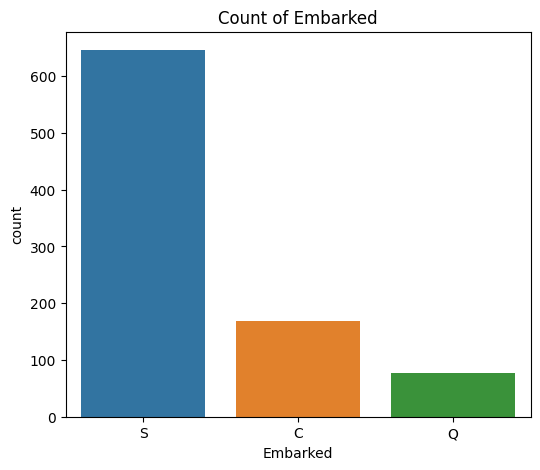

In [33]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(6, 5))
    sns.countplot(x=col, data=df, hue=col)
    plt.title(f'Count of {col}')
    plt.show()

## 3.3 Create pair plots to explore relationships between features

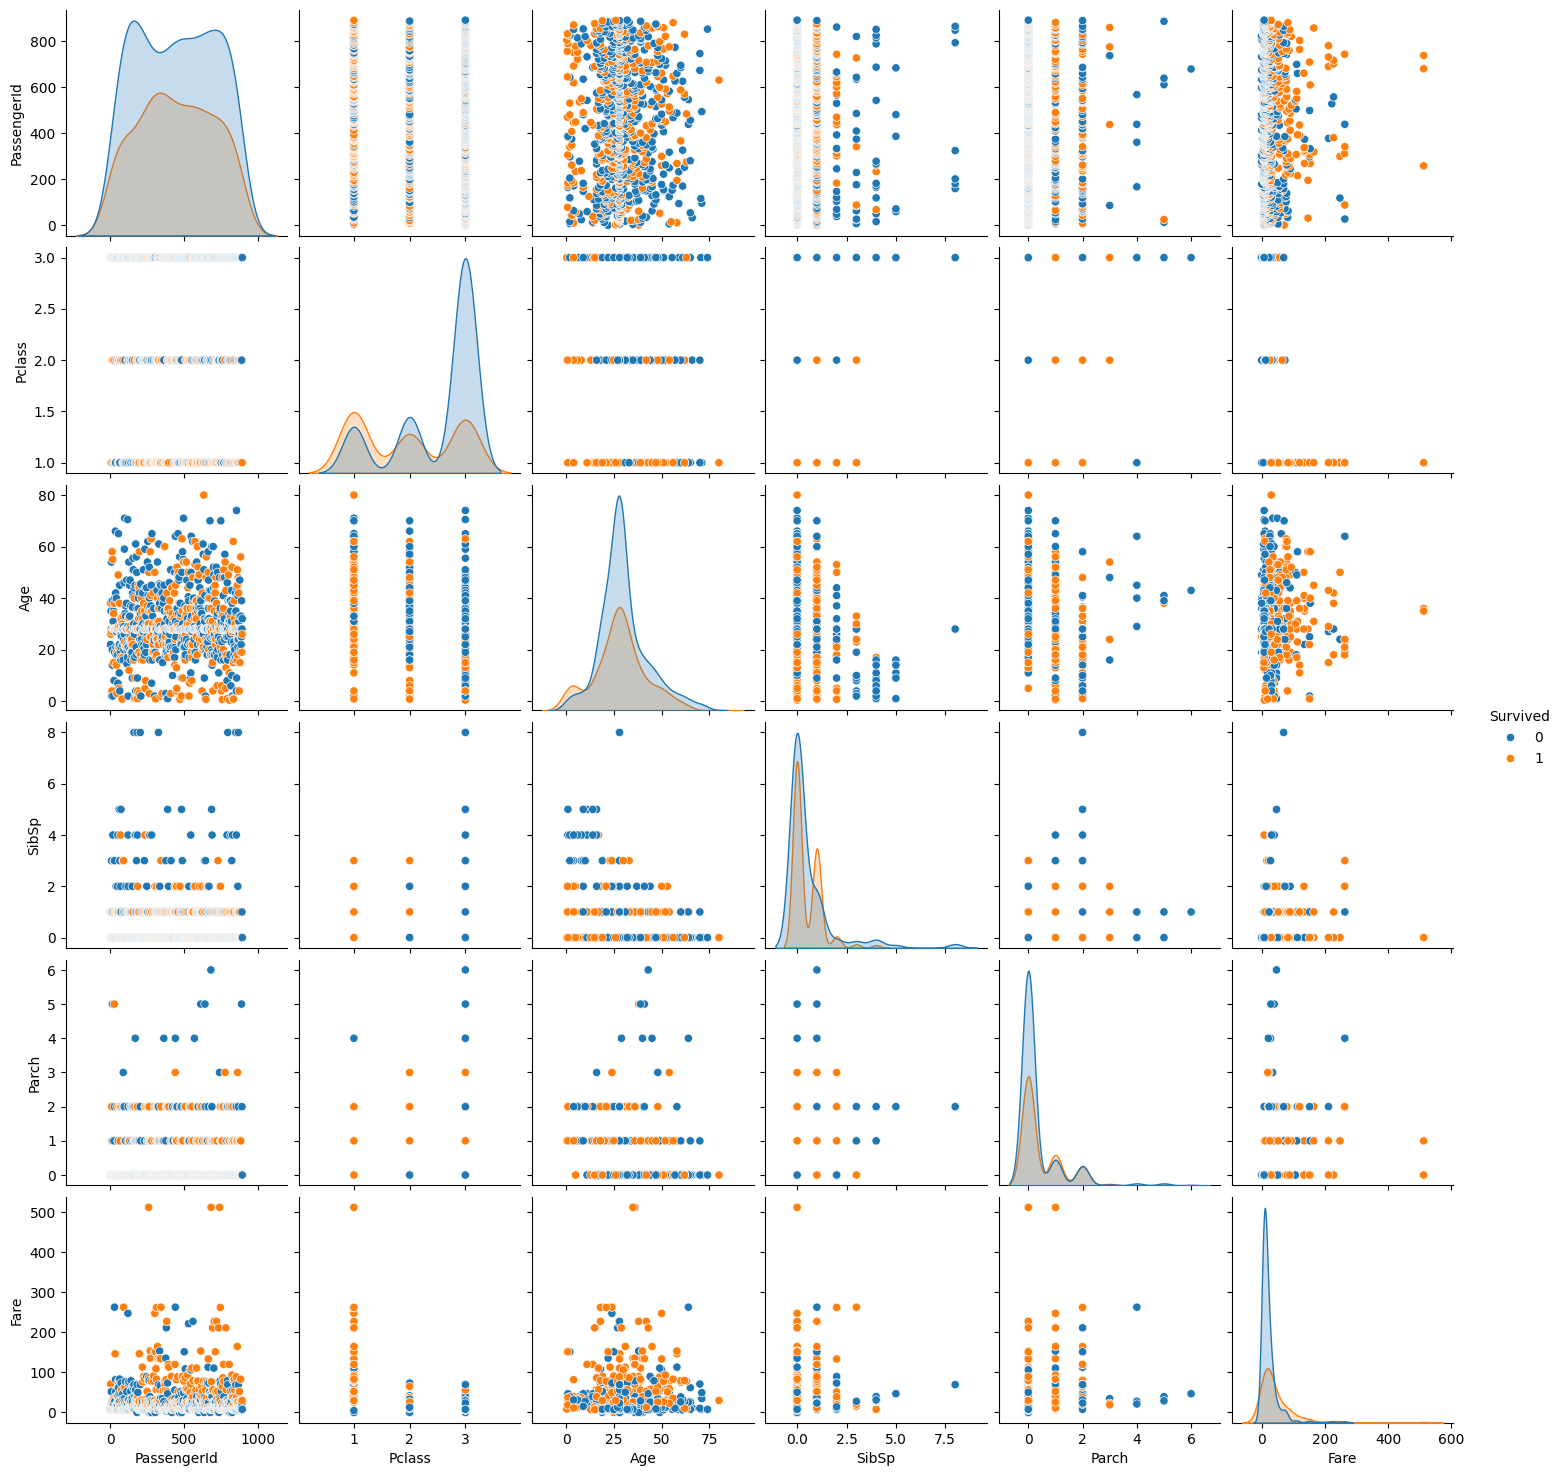

In [37]:
sns.pairplot(df, hue='Survived')
plt.show()

## 3.4 Visualize correlations between numerical features using a heatmap

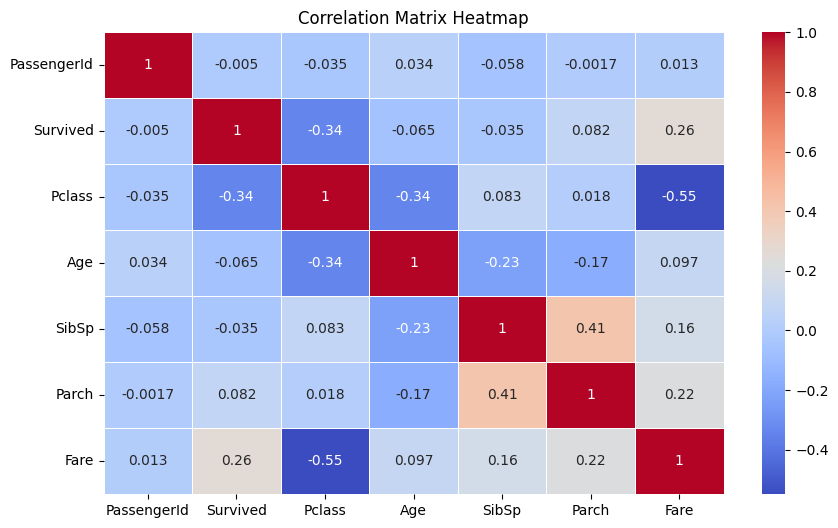

In [39]:
numerical_features = df.select_dtypes(include=['number']).columns

corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 4. Handle Features

## 4.1 Convert categorical features to numerical

In [75]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [76]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [77]:
df.sample()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
202,203,0,3,0,34.0,0,0,6.4958,2


## 4.2 Create new features if needed

Create a new feature 'FamilySize' which is the sum of 'SibSp' and 'Parch'

In [78]:
df['FamilySize'] = df['SibSp'] + df['Parch']

In [79]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,2,1
1,2,1,1,1,38.0,1,0,71.2833,0,1
2,3,1,3,1,26.0,0,0,7.9250,2,0
3,4,1,1,1,35.0,1,0,53.1000,2,1
4,5,0,3,0,35.0,0,0,8.0500,2,0


# 5. Drop Outliers

## 5.1 Identify outliers using the IQR method

In [80]:
def identify_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers

In [81]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

outliers_dict = {
  col: identify_outliers(df,col) for col in numerical_columns
}

# Display outliers
print('Outliers in the dataset:')
for col, outliers in outliers_dict.items():
    print(f'\nOutliers in {col}:')
    print(outliers)

Outliers in the dataset:

Outliers in PassengerId:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, FamilySize]
Index: []

Outliers in Survived:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, FamilySize]
Index: []

Outliers in Pclass:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, FamilySize]
Index: []

Outliers in Sex:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, FamilySize]
Index: []

Outliers in Age:
     PassengerId  Survived  Pclass  Sex    Age  SibSp  Parch     Fare  \
7              8         0       3    0   2.00      3      1  21.0750   
11            12         1       1    1  58.00      0      0  26.5500   
15            16         1       2    1  55.00      0      0  16.0000   
16            17         0       3    0   2.00      4      1  29.1250   
33            34         0  

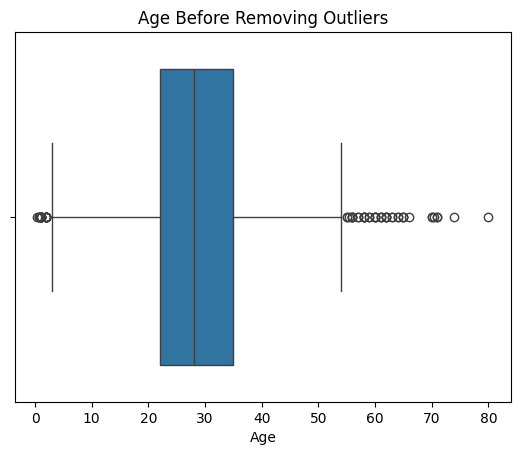

In [83]:
sns.boxplot(x=df['Age'])
plt.title('Age Before Removing Outliers')

plt.show()

## 5.2 Drop Outliers in Age

In [84]:
df.shape

(891, 10)

In [85]:
age_outliers = identify_outliers(df, 'Age')
df= df.drop(age_outliers.index)

In [86]:
df.shape

(825, 10)

In [87]:
df.reset_index(drop=True, inplace=True)

In [88]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,2,1
1,2,1,1,1,38.0,1,0,71.2833,0,1
2,3,1,3,1,26.0,0,0,7.9250,2,0
3,4,1,1,1,35.0,1,0,53.1000,2,1
4,5,0,3,0,35.0,0,0,8.0500,2,0


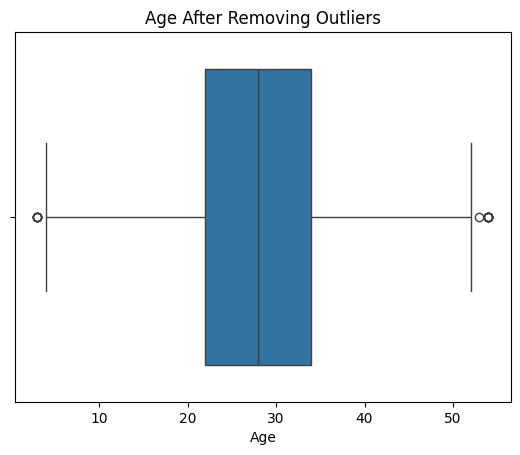

In [90]:
sns.boxplot(x=df['Age'])
plt.title('Age After Removing Outliers')

plt.show()